In [1]:
#Import Relevant Modules
import re
from datetime import datetime, date
from time import sleep
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from IPython.display import clear_output

In [2]:
#Retrive today's date
date = date.today()

In [3]:
def getPressureData(filename):
    '''
    Extract pressure data from txt file

    @param:
        filename -> str
    
    @return:
        2D list of Time and Pressure -> list
    '''
    
    data = []                          
    pressure_pattern = re.compile(r'\[(\d{2}:\d{2}:\d{2})\].*?pressure:\s*([0-9.]+E[-+]?\d+)', re.I)
    
    with open(filename, "r") as f:
        for line in f:
            p = pressure_pattern.search(line)
            if p:
                time_str = p.group(1)
                pressure = p.group(2)
                log_time = datetime.strptime(time_str, "%H:%M:%S").time()

                data.append((log_time, pressure))
    return data

In [4]:
def createPressureCSV(pressure_data):
    '''

    @param:
    pressure_data: list of data -> list
    '''
    #Using 'w' to overwrite existing
    with open(f'pressure_log-{str(date)}.csv', 'w', newline='') as out:
        writer = csv.writer(out)
        writer.writerow(['Time', 'Pressure (mbar)'])   # header
        writer.writerows(pressure_data)
    print(f'{len(pressure_data)} rows written to pressure_log-{str(date)}.csv')

In [ ]:
def getPressureGraph(csv_file, start_time='00:00:01', end_time='23:59:59', time_list = []):
    '''
    Displays Pressure Graph

    @param:
        csv_file : File Name -> str
        start_time : -> str
        end_time : -> str
    
    '''
    result = pd.read_csv(csv_file)

    data = result.to_numpy()

    #Check if time exists to provide warning
    if (result.loc[result['Time'] == start_time]).empty:
        print("Start Time does not exist, using default start time")

    if (result.loc[result['Time'] == end_time]).empty:
        print("End Time does not exist, using default end time")

    # Filter by time range
    filtered = result[(result['Time'] >= start_time) & (result['Time'] <= end_time)]
    average = filtered.iloc[:,1].to_numpy().mean()

    
    highlight = result[result['Time'].isin(time_list)]
    print(highlight) 
    

    fig = plt.figure(figsize=(12,10))
    gs = fig.add_gridspec(4,1)

    ax1 = fig.add_subplot(gs[:3,0])
    ax1.plot(filtered['Time'].to_numpy(), filtered['Pressure (mbar)'].to_numpy())
    ax1.scatter(highlight['Time'], highlight['Pressure (mbar)'],  color='red', label='High Pressure')
    ax1.grid()
    ax1.set_title('Pressure x Time')
    ax1.set_xlabel("Time")
    ax1.set_ylabel("Pressure mbar (E-6)")

    plt.show()

23856 rows written to pressure_log-2025-06-10.csv
Start Time does not exist, using default start time
End Time does not exist, using default end time
Empty DataFrame
Columns: [Time, Pressure (mbar)]
Index: []


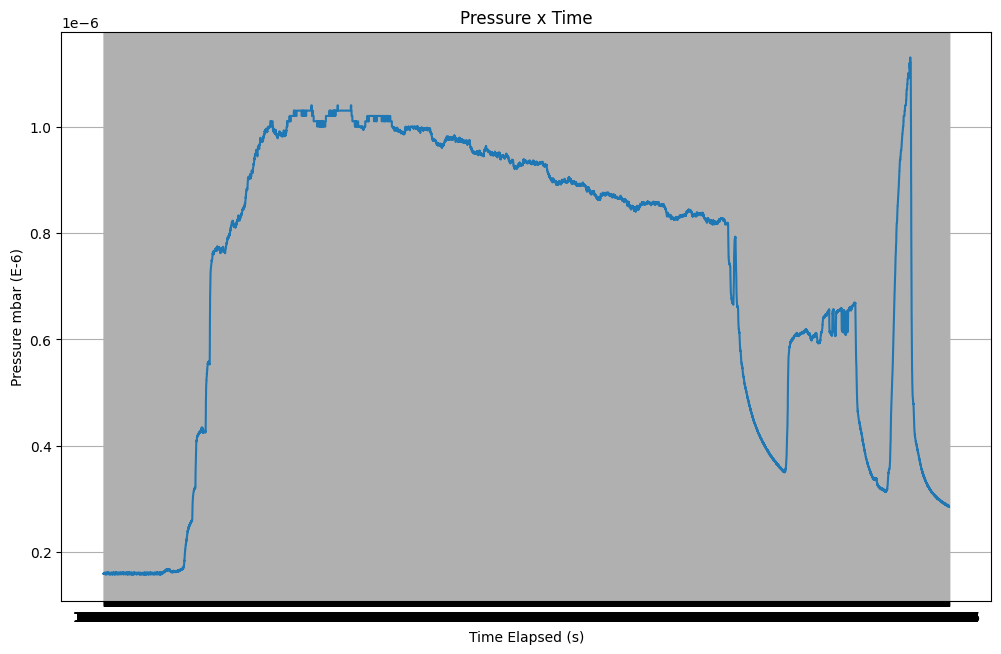

In [8]:
createPressureCSV(getPressureData('log_export_2025-06-09_17-10-43.txt'))
getPressureGraph(f'pressure_log-{date}.csv')

In [7]:
while 1 :
    createPressureCSV(getPressureData('log_export_2025-06-09_17-10-43.txt'))
    getPressureGraph(f'pressure_log-{date}.csv')
    sleep(10)
    clear_output(wait=True)

23856 rows written to pressure_log-2025-06-10.csv
Start Time does not exist, using default start time
End Time does not exist, using default end time
Empty DataFrame
Columns: [Time, Pressure (mbar)]
Index: []


KeyboardInterrupt: 